# Regression Analysis


In this assignment you will train a model for a regression problem based on linear regression with polynomial feature extension. You are not allowed to use sklearn or any existing python libraries that implements Linear or Polynomial Regresssion in any form. You are expected to write the source code by yourselves, including the gradient descent algorithm. 


## Dataset
You are given a 1D dataset and the ground truth targets for the regression in train.csv file. You are also provided with test.csv file for the model evaluations. Do not use any data from the test data in your model trainings. 

## Requirements
Include all the source codes in the following cells; make sure that the codes are sufficiently documented in each section. After training your model, provide regression plots for the train and test data (separately) as well. Report your MSE and average Root Mean Square Error that you obtain using the test data in the Report Section (below). Also, provide all the hyperparameters and their values following the source codes in seperate cells.

Connect gdrive for train/test dataset:

In [165]:
from google.colab import drive # import lib
drive.mount("/content/gdrive") # mount gdrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Import libraries:

In [166]:
import numpy as np # for np array ops
import matplotlib.pyplot as plt # for visualization purposes

Read .csv from gdrive and parse "x" and "t" into two lists:

Length of Training Data:  150
Train data visualized (x axis: X, y axis: T:


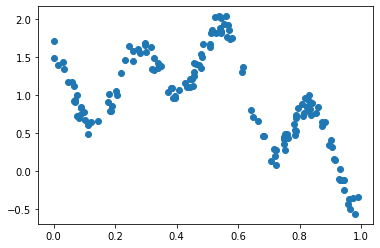

In [301]:
sTrainAdd = "/content/gdrive/MyDrive/cmp712/hw1/train.csv" # address of train.csv on gdriveg
from pandas import * # for array ops
data = read_csv(sTrainAdd) # read train.csv
X = data['x'] # assign dataset argument into X
vIdx = sorted(range(len(X)), key=lambda k: X[k])
X = X[vIdx]
min_x = min(X)
X = X - min_x
#X.sort_values(ascending=True)
T = data['t'] # assign dataset value into T
T = T[vIdx]
TRAIN_DATASET_LENGTH = len(X) # get length of dataset
print('Length of Training Data: ', TRAIN_DATASET_LENGTH)
print('Train data visualized (x axis: X, y axis: T:')
plt.scatter(X, T) # check if data is ok

**updateParams**, **calcDeriv** and **calcPoly** methods are created in order to set a generic structure for testing different order polynomials:

Generic method to calculate partial derivatives of MSE loss function wrt to polynomial parameters:

In [220]:
def calcLossPartialDeriv(T_Pred, nOrder):
  res = (-2/TRAIN_DATASET_LENGTH) * np.sum((T - T_Pred) * np.transpose(np.power(X, nOrder)))
  return res

Generic method to calculate different order polynomials:

In [240]:
def calcPoly(x, params):
  sum = 0
  nOrder = len(params) - 1
  for n in range(0, len(params)):
    sum += params[n] * np.power(x, nOrder - n)
  return sum

Loss Function is Mean Squared Error **(MSE)**:

In [298]:
def calcLoss(truth, pred, vParams, nReg):
  loss = 1/TRAIN_DATASET_LENGTH * np.sum(np.power(truth - pred, 2)) + nReg * sum(vParams)/len(vParams)
  return loss

Trainer method:

In [296]:
def trainer(X, T, nLearningRate, nPolyOrder, nLossLim, nIterLim, nReg):
  vPolyParams = np.zeros(nPolyOrder + 1) # Polynomial constants stored in np array
  vLossPartialDerivs = np.zeros(nPolyOrder + 1) # Partial derivatives of loss function stored in np array
  nIter = 0 # Iteration counter
  nLoss = 999999 # Used for exit condition of minimum loss, initially set to a large number
  while (abs(nLoss)>nLossLim) and (nIter<nIterLim): # train until loss decreases to a certain value or number of iterations reached
    T_Pred = calcPoly(X, vPolyParams) # calculate predictor's values
    nLoss = calcLoss(T, T_Pred, vPolyParams, nReg) # calculate loss
    #print(nLoss)
    for i in range(0, nPolyOrder+1): # calculate derivatives and update parameters
      vLossPartialDerivs[i] = calcLossPartialDeriv(T_Pred, nPolyOrder-i) # calculate partial derivatives
    vPolyParams = vPolyParams - nLearningRate * vLossPartialDerivs
    nIter = nIter + 1
    if(nIter%10==0):
        print("progress:", nIter/nIterLim*100, "loss=", nLoss)
  return vPolyParams

Trainer wrapper:

In [304]:
# Hyperparam.s:
LEARNING_RATE = 0.2
REGULARIZATION = 0.2
POLY_ORDER = 8
LIM_LOSS = 0.01
LIM_ITER = 1000
vPolyParams = trainer(X, T, LEARNING_RATE, POLY_ORDER, LIM_LOSS, LIM_ITER, REGULARIZATION)
print(vPolyParams)

progress: 1.0 loss= 0.21575362682407115
progress: 2.0 loss= 0.15255045176591636
progress: 3.0 loss= 0.14402445018760895
progress: 4.0 loss= 0.141188850476151
progress: 5.0 loss= 0.1394159604955771
progress: 6.0 loss= 0.13804526567335054
progress: 7.000000000000001 loss= 0.13691395305221016
progress: 8.0 loss= 0.13595721290595641
progress: 9.0 loss= 0.13513825476582014
progress: 10.0 loss= 0.13443135061748568
progress: 11.0 loss= 0.1338167334386579
progress: 12.0 loss= 0.13327864712726264
progress: 13.0 loss= 0.1328043502294709
progress: 14.000000000000002 loss= 0.13238347049976576
progress: 15.0 loss= 0.13200752955293957
progress: 16.0 loss= 0.13166957359215098
progress: 17.0 loss= 0.13136388071427801
progress: 18.0 loss= 0.13108572709997574
progress: 19.0 loss= 0.13083119957556752
progress: 20.0 loss= 0.13059704501742572
progress: 21.0 loss= 0.13038054913391742
progress: 22.0 loss= 0.13017943871684312
progress: 23.0 loss= 0.12999180266818766
progress: 24.0 loss= 0.12981602806597367
pr

Visualize Training Data Result:

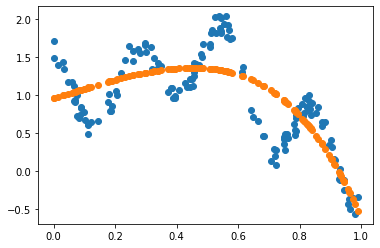

In [305]:
T_Pred = calcPoly(X, vPolyParams)
plt.scatter(X, T) 
plt.scatter(X, T_Pred)

# Report
Write your test results and utilized hyperparameter parameter values in this section. Briefly discuss how your algorithm works; and why it works as it is.